#Deep Learning
Lesson 6:

In this lesson, we will cover:

Graph Neural Networks

Teachers:

Fabrizio Silvestri (fsilvestri@diag.uniroma1.it)

Antonio Purificato (antonio.purificato@uniroma1.it)

Farooq Wani (wani@diag.uniroma1.it)

Maria Sofia Bucarelli (bucarelli@diag.uniroma1.it)



In [ ]:
!pip install pytorch-lightning

In [ ]:
# Install  Pytorch Geometric.
import torch
use_gpu = True
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 52.0 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 39.3 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.0 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.8/887.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.7 MB/s eta 0:00:00


In [ ]:
import pytorch_lightning as pl
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
import seaborn as sn

In [ ]:
import torch.nn as nn

In [ ]:
!pip install livelossplot --quiet
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from livelossplot import PlotLosses
from livelossplot.outputs import matplotlib_subplots

In [ ]:
# Necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import pandas as pd
import networkx as nx #for visualization
import numpy as np

# Graph representation

A **simple graph**  $\mathcal{G}$ is a pair  $  \{\mathcal{V},\mathcal{E}\}$ where $\mathcal{V}$ is a set of elements called vertices and $\mathcal{E} \subset \mathcal{V}x \mathcal{V} $ consists of pairs of vertices. The elements of  $\mathcal{E}$  are called edges (sometimes links or lines).

We write  $\mathcal{G} = \{\mathcal{V},\mathcal{E}\}$.

In undirected simple graph.
$$ \mathcal{E} \subseteq \{ \{x,y \} | x,y \in \mathcal{V}, \; x \neq y \} $$
is a set of unordered pairs of vertices.

We say that two vertices $v_i, v_j $ are adjacent if $ \{ v_i, v_j \} \in \mathcal{E} $.





Examples of graphs we use in applications are social networks, in this case nodes represent a person, and edges represent their connections (friends, followers, etc...) or molecules.



The **adjacency matrix** $A$ of a graph is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph, in fact :
Suppose $ \mathcal{V}= \{ v_1, \dots, v_n \} $

$$A_{ij}=  
\begin{cases}
1 & \textrm{ if } v_i, v_j \textrm{ if } \{ v_i, v_j \} \in \mathcal{E} \\
0 & \textrm{ otherwise}.
\end{cases}$$

For undrected graph the adjacency matrix is symmetric.

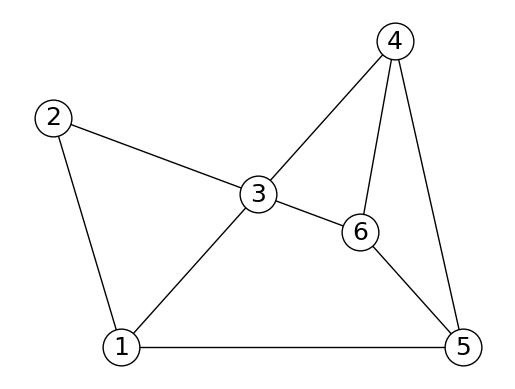

In [ ]:
#@title

G = nx.Graph([ (1, 2), (1, 3),(1, 5),(2, 3) ,(3,6),  (3, 4), (4, 6), (5, 6)])
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.2), 4: (4, 0.4), 5: (5, 0), 6:(3.5, 0.15)}

options = {
    "font_size": 18,
    "node_size": 700,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped

plt.axis("off")
plt.show()








A directed graph or digraph is a graph in which edges have orientations.
$$ \mathcal{E} \subseteq \{(x,y) | (x,y) \in V^{2} \; {\textrm{and}} \; x\neq y \} $$ the set of edges consist of ordered pairs of vertices.
In this case
$$A_{ij}=  
\begin{cases}
1 & \textrm{ if } v_i, v_j \textrm{ if } (v_i, v_j ) \in \mathcal{E} \\
0 & \textrm{ otherwise}.
\end{cases}$$


Graph vertices can be associated to a signal or feature vector $\mathbf{x} \in \mathbb{R}^{N\times F}$.


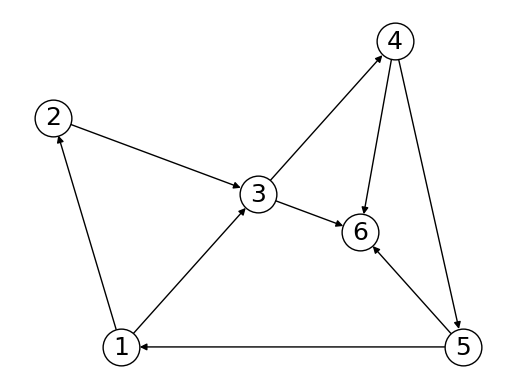

In [ ]:
#@title

G = nx.DiGraph([ (1, 2), (1, 3),(5, 1),(2, 3) ,(3,6),  (3, 4), (4, 6), (5, 6)])
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.2), 4: (4, 0.4), 5: (5, 0), 6:(3.5, 0.15)}

options = {
    "font_size": 18,
    "node_size": 700,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped

plt.axis("off")
plt.show()

### Questions:

https://forms.gle/EbhiS1jATCshnNRb7


## Libraries
1) <img src="https://raw.githubusercontent.com/pyg-team/pyg_sphinx_theme/master/pyg_sphinx_theme/static/img/pyg_logo_text.svg?sanitize=true" alt="drawing" width="100"/> [PyG (PyTorch Geometric)](https://pytorch-geometric.readthedocs.io/en/latest/)  is a library built upon PyTorch to easily write and train Graph Neural Networks (GNNs) for a wide range of applications related to structured data.

2)  <img src="https://camo.githubusercontent.com/c8e685c644c3fb27c874af87a405d53c382d0de61d8edde0fd0d9aac2a4345d8/687474703a2f2f646174612e64676c2e61692f61737365742f6c6f676f2e6a7067" alt="drawing" width="100"/> [DGL](https://www.dgl.ai) is a Python package for deep learning on graphs. DGL is framework agnostic, meaning if a deep graph model is a component of an end-to-end application, the rest of the logics can be implemented in any major frameworks, such as PyTorch, Apache MXNet or TensorFlow.




3)  <img src="https://camo.githubusercontent.com/1369e2565dde0271e9611eecfa036eb789be191fd7cd4d56a3f2c38c44e49c3d/68747470733a2f2f64616e69656c65677261747461726f6c612e6769746875622e696f2f7370656b7472616c2f696d672f6c6f676f5f6461726b2e737667" alt="drawing" width="100"/>  [Spektral ](https://graphneural.network) is a Python library for graph deep learning, based on the Keras API and TensorFlow 2.



4)<img src="https://avatars.githubusercontent.com/u/8596759?s=280&v=4" alt="drawing" width="45"/>   [Graph Nets](https://deepmind.com/research/open-source/graph-nets-library)
 is a DeepMind's library for building graph networks in Tensorflow and Sonnet.


5) <img src="https://raw.githubusercontent.com/deepmind/jraph/master/images/logo.png" width="30"/>  [Jraph](https://github.com/deepmind/jraph)
 is a lightweight library for working with graph neural networks in jax. It provides a data structure for graphs, a set of utilities for working with graphs, and a 'zoo' of forkable graph neural network models.

Programming language for all these libraries: Python

|  Library Name |Deep Learning Framework  |    
|---|---|
| Pytorch Geometric  |   PyTorch |      
| Deep Graph Library  | PyTorch, TF, MxNet  |  
|Spektral   |   Tensorflow2/Keras |    
|Graph Nets   |  Tensorflow, Sonnet |
|Jraph  |  JAX   




## The PyTorch geometric graph object




A single graph in  PyTorch Geometric is described by an instance of torch_geometric.data.Data which holds the following attributes by default:

**data.x**: Node feature matrix with shape `[num_nodes, num_node_features]`

**data.edge_index**: Graph edges with shape `[2, num_edges]` and type torch.long

**data.edge_attr**: Edge feature matrix with shape `[num_edges, num_edge_features]`

**data.y**: Ground truth target. May have arbitrary shape. In case of node-level targets its shape is `[num_nodes, num_classes]` for graph-level targets, it is `[1, num_classes]`

**data.pos**: Node position matrix with shape `[num_nodes, num_dimensions]`

None of these attributes are required.


Let's experiment with the Data class by building our own small graph structure:

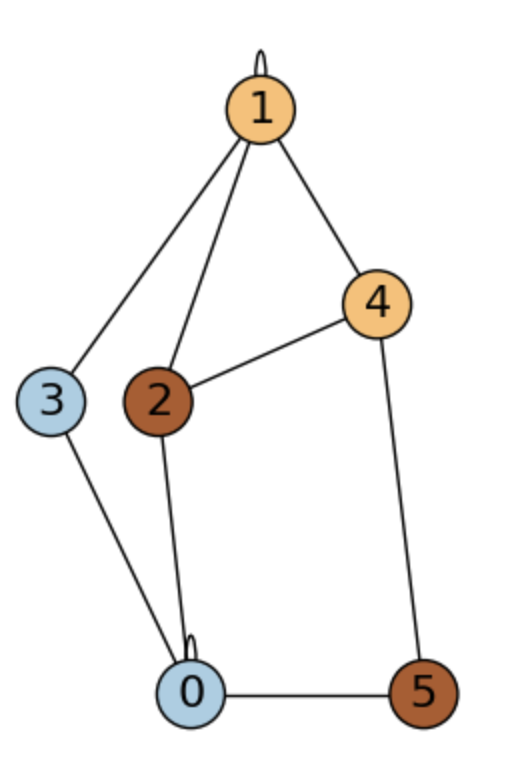

In [ ]:
import torch_geometric
from torch_geometric.data import Data

In [ ]:
import torch_geometric
from torch_geometric.data import Data

# Graph edges
edge_index = torch.tensor([[0, 0], # self-loop
                           # to add
                            # .., # self-loop for node 1
                            # ...
                           ],
                           dtype=torch.long)
labels = [0,1,2,0,1,2]

# Define graph nodes and their features
x = torch.randn(6)

# Creating the pytorch geometric object
data = Data(x=x, edge_index=edge_index.t(), y=labels)

In [ ]:
#  Let's print the properties of our graph ###

print("Number of nodes:", data.num_nodes)
print("Number of features:", data.num_node_features)
print("Number of edges:", data.num_edges)
print("Contains isolated nodes:",data.has_isolated_nodes())
print("Contains self-loops:", data.has_self_loops())
print("Is undirected:", data.is_undirected())

Number of nodes: 6
Number of features: 1
Number of edges: 10
Contains isolated nodes: False
Contains self-loops: True
Is undirected: False


[TORCH_GEOMETRIC.TRANSFORMS](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.ToUndirected)


[TORCH_GEOMETRIC.UTILS](https://pytorch-geometric.readthedocs.io/en/latest/modules/utils.html)

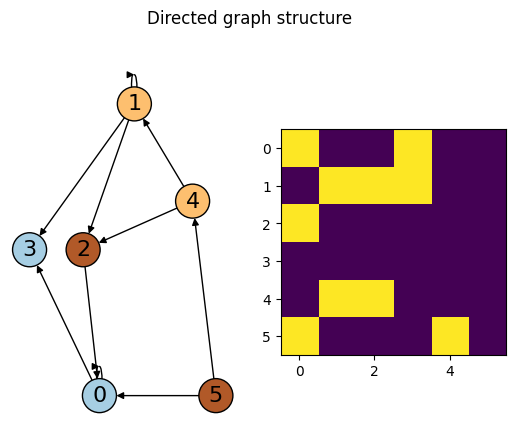

In [ ]:
# Visualization

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Directed graph structure')


# Converting from pytorch geometric to networkx for visualisation
g = torch_geometric.utils.to_networkx(data, to_undirected=False)


pos = np.array([[0, 0],[1.5,3],[-0.7, 1.5],[-3, 1.5],[4, 2], [5, 0]])

options = {
    "font_size": 16,
    "node_size": 600,
    "node_color": data.y,
    "cmap": plt.get_cmap('Paired'),
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "ax": ax1,
    "with_labels": True
}

nx.draw(g, pos,  **options)
adj = torch_geometric.utils.to_dense_adj(data.edge_index).squeeze()
ax2.imshow(adj.numpy())

Is undirected: True


NetworkXError: ignored

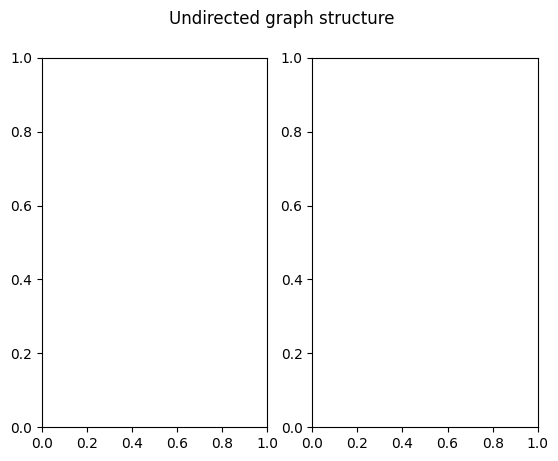

In [ ]:
import torch_geometric.transforms as T

# Here we create an undirected graph from the directed graph we defined above
data1 = T.ToUndirected()(data)
print("Is undirected:", data1.is_undirected())

g = torch_geometric.utils.to_networkx(data1, to_undirected=True )
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Undirected graph structure')


options = {
    "font_size": 16,
    "node_size": 600,
    "node_color": data.y,
    "cmap": plt.get_cmap('Paired'),
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "ax": ax1,
    "with_labels": True
}


nx.draw(g, pos,  **options)
adj = torch_geometric.utils.to_dense_adj(data.edge_index).squeeze()
ax2.imshow(adj.numpy())


we can also create a graph and then change its attributes


In [ ]:
data_graph = Data()
data_graph.edge_index= edge_index.t()
data_graph

Data(edge_index=[2, 10])


## Graph Classification

For this task we will be using the PROTEINS dataset.
This is a datset of proteins that are classified as enzymes or non-enzymes.


Nodes represent the amino acids and two nodes are connected by an edge if their distance is less than 6 Angstroms.

PROTEINS datset contains 1113 graphs (each protein is represented as a graph).

Pytorch geomtric has a set of dataset that are already preprocessed and ready to download [TORCH_GEOMETRIC.DATASETS](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html).

In particular PROTEINS is part of the collection of benchmark datasets [TUDataset](https://chrsmrrs.github.io/datasets/docs/datasets/).

In [ ]:
# Download the data
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/data',name='PROTEINS')

# Print some properties of the dataset

print(f'Dataset: {dataset}:')
print('--------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


Dataset: PROTEINS(1113):
--------------------
Number of graphs: 1113
Number of features: 3
Number of classes: 2


In [ ]:
dataset[0]

Data(edge_index=[2, 162], x=[42, 3], y=[1])

In [ ]:
# Construct training and test sets
dataset = dataset.shuffle()

dataset_train = dataset[:1000]
dataset_test = dataset[1000:]

print(f'Number of training graphs: {len(dataset_train)}')
print(f'Number of test graphs: {len(dataset_test)}')


Number of training graphs: 1000
Number of test graphs: 113


Number of nodes: 66
Number of edges: 250
Average node degree: 3.79
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True
Label: tensor([0])


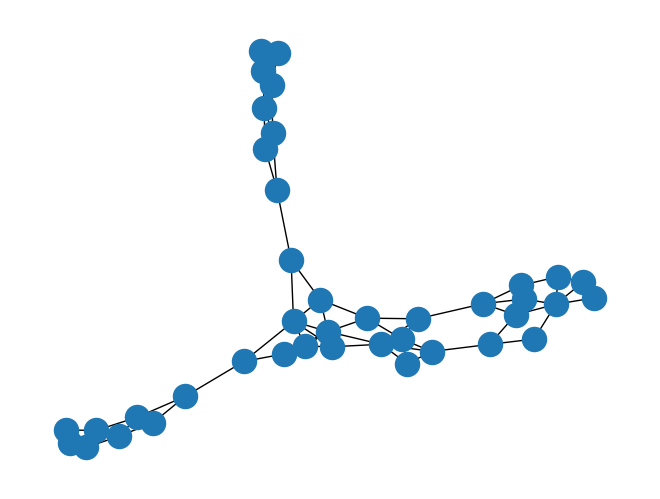

In [ ]:
#@title Let's visualise a graph example
example = 524           #@param {type:"slider", min:0, max:900, step:1}

data = dataset_train[example]

#  Some statistics about the example  graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

data = dataset[example]
print("Label:", data.y)


g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g)



### [ADVANCED MINI-BATCHING](https://pytorch-geometric.readthedocs.io/en/latest/notes/batching.html)

Pytorch geometric's **dataloader class** affords to sample batches of graphs from our dataset to achieve efficient parallelisation during training.


In contrast to the image or language domain stacking batches is not straightforward due to the variable graph sizes.

In PyG, to achieve parallelization across a number of examples they tack all graphs in the batch so as to create a large graph.

Aadjacency matrices are stacked in a diagonal fashion (creating a giant graph that holds multiple isolated subgraphs), and node and target features are simply concatenated in the node dimension, i.e.

\begin{split}\mathbf{A} = \begin{bmatrix} \mathbf{A}_1 & & \\ & \ddots & \\ & & \mathbf{A}_n \end{bmatrix}, \qquad \mathbf{X} = \begin{bmatrix} \mathbf{X}_1 \\ \vdots \\ \mathbf{X}_n \end{bmatrix}, \qquad \mathbf{Y} = \begin{bmatrix} \mathbf{Y}_1 \\ \vdots \\ \mathbf{Y}_n \end{bmatrix}.\end{split}



/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Number of nodes: 1310
Number of edges: 32
DataBatch(edge_index=[2, 4782], x=[1310, 3], y=[32], batch=[1310], ptr=[33])


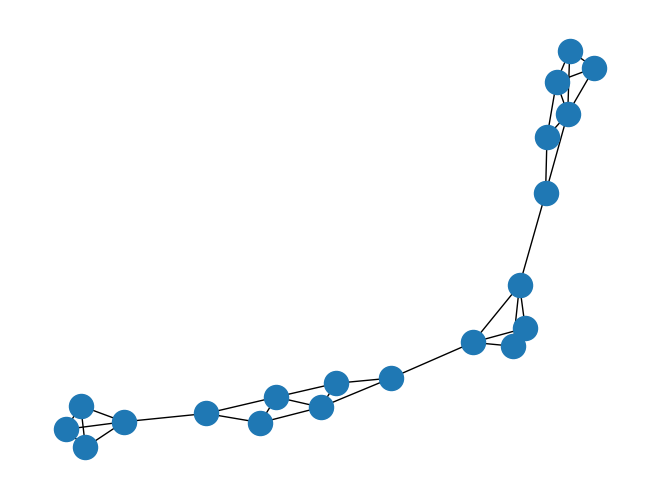

In [ ]:
from torch_geometric.data import DataLoader

train_dataloader = DataLoader(dataset_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=32, shuffle=False)

batch = next(iter(test_dataloader))

# Gather some statistics about the batch.
print(f'Number of nodes: {batch.num_nodes}')
print(f'Number of edges: {batch.num_graphs}')
print(batch)


g = torch_geometric.utils.to_networkx(batch[0], to_undirected=True)
nx.draw(g)

## Graph convolutions

The convolution operator to irregular domains is typically expressed as a neighborhood aggregation or message passing scheme.
 $\mathbf{x}_i^{(k-1)} \in \mathbb{R}^F $ denotes node features of node
$i$ in layer $k-1$.

$ \mathbf{e}_{j,i} \in \mathbb{R}^D$ denotes (optional) edges features from node $j $ to node $i$.

$$\mathbf{x}_i^{(k)} = \gamma^{(k)} \left( \mathbf{x}_i^{(k-1)}, \square_{j \in \mathcal{N}(i)} \, \phi^{(k)}\left(\mathbf{x}_i^{(k-1)}, \mathbf{x}_j^{(k-1)},\mathbf{e}_{j,i}\right) \right),$$

$ \square_{j \in \mathcal{N}(i)}$ denote an aggregation (permutation invariant) function, e.g., sum, mean or max.


### Questions:

https://forms.gle/EbhiS1jATCshnNRb7


### The message passing class

PyG provides the `MessagePassing` base class, which helps in creating such kinds of message passing graph neural networks by automatically taking care of message propagation. The user only has to define the functions
$\phi$ , i.e. `message()`, and $\gamma$  , i.e. `update()`, as well as the aggregation scheme to use, i.e. `aggr="add"`, `aggr="mean"` or `aggr="max"`.


-The **message** function implements function $\phi^{(k)}$, which describes how messages are computed for each graph node.

-The **aggregate** function specifies function $\square_{j \in \mathcal{N}(i)}$, describing how messages are aggregated across a node's neighbourhood $\mathcal{N}(i)$. Possible aggregation functions are "add", "mean" or "max".

-The **update** function implements function $\gamma^{(k)}$, which specifies how a node's feature is updated according to the messages received after propagation.

-The **propagate** function propagates computed messages across the graph according to its connectivity, and internally calls message, update and aggregate functions.  




Let's practise by re-implementing a GIN , described in  [How Powerful are Graph Neural Networks? (Xu et al.  ICLR  2019 )](https://arxiv.org/abs/1810.00826)
In this case


$$\mathbf{x}_i^{(k)} = \textrm{MLP}^{(k)} \left( (1 + \epsilon^{(k)}) \cdot \mathbf{x}_i^{(k-1)} + \sum_{j \in \mathcal{N}(i)}  \mathbf{x}_j^{(k-1)}, \right),$$

where $\textrm{MLP}^{(k)} $ is a sequence of linear layers, and $\epsilon$ is a learnable parameter.


So :

- **message** function :  $\phi^{(k)}\left(\mathbf{x}_i^{(k-1)}, \mathbf{x}_j^{(k-1)},\mathbf{e}_{j,i}\right) = \mathbf{x}_i^{(k-1)} $.

- **aggregate** function: $ \square_{j \in \mathcal{N}(i)}= \sum_{j \in \mathcal{N}(i)} $  ( "add").

- **update** function:  $\gamma^{(k)}(\mathbf{x}_i^{(k-1)},  \square_{j \in \mathcal{N}(i)}\mathbf{x}_j^{(k-1)}) = \textrm{MLP}^{(k)}( \mathbf{x}_i^{(k-1)}+  \square_{j \in \mathcal{N}(i)}\mathbf{x}_j^{(k-1)})  $.


In [ ]:
from torch_geometric.utils import remove_self_loops
from torch_geometric.nn import MessagePassing


class GIN_Conv(MessagePassing):
    def __init__(self, MLP, eps = 0.0):
        super().__init__(aggr='add')  # Aggregation function over the messages.
        self.mlp = MLP
        self.epsilon = torch.nn.Parameter(torch.tensor([eps]))

    def message(self, x_j):
      return x_j

    def update(self,aggr_out,x):
      x = (1+self.epsilon) * x + aggr_out
      return self.mlp(x)

    def forward(self, x, edge_index):
      # Step 1: remove self-loops to the adjacency matrix.
      edge_index, _ = remove_self_loops(edge_index)
      # Step 2: Start propagating messages.
      return self.propagate(edge_index, x=x)





In this way we update node feature representations, but our task is a graph classification task! What about graph representation?

> Indented block



$$r_G = \textrm{READOUT}( \{ x_{v}^{(k)}| v \in G \})| k = 0, \dots , L).$$


[Readout functions provided by PyG](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers).
We will use  `global_mean_pool` that returns batch-wise graph-level-outputs by averaging node features across the node dimension, so that for a single graph $\mathcal{G}_i$ with $N_i$ nodes  its output is computed by
$$\mathbf{r}_i = \frac{1}{N_i} \sum_{n=1}^{N_i} \mathbf{x}_n,$$
$\mathbf{x}$  node features.

In [ ]:
# Let's test our convolution operator

batch = next(iter(train_dataloader))
mlp =  torch.nn.Sequential(torch.nn.Linear(batch.num_node_features, 32), torch.nn.ReLU(), torch.nn.Linear(32,32))
gin = GIN_Conv(mlp)
features = gin(batch.x, batch.edge_index)
print(features)

tensor([[-0.1442,  0.2257, -0.0382,  ..., -0.7402, -0.5853,  0.2627],
        [-0.2654,  0.0991, -0.0692,  ..., -0.5333, -0.4891,  0.2665],
        [-0.4436, -0.1537, -0.1524,  ..., -0.2301, -0.6583,  0.6330],
        ...,
        [-0.4436, -0.1537, -0.1524,  ..., -0.2301, -0.6583,  0.6330],
        [-0.4477, -0.1408, -0.0870,  ..., -0.0170, -0.5451,  0.7844],
        [-0.5026, -0.2342, -0.1204,  ..., -0.1509, -0.8034,  0.8614]],
       grad_fn=<AddmmBackward0>)


## Graph classification model

Now we have all the ingredients to build and train a model for our classification task. We will build a model with 3 convolution layers and a global mean pooling operation.


In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import global_max_pool

torch.manual_seed(8)

class MLP(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(MLP, self).__init__()
        self.first_fc = Linear(in_dim, hidden_dim)
        self.second_fc = Linear(hidden_dim, out_dim)
        self.activation = torch.nn.ReLU()

        # You could use torch.nn.Sequential

    def forward(self, x):
        x = self.activation(self.first_fc(x))
        x = self.activation(self.second_fc(x))

        return x

class Graph_Net(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim, num_classes):
        super(Graph_Net, self).__init__()
        self.mlp_input =  MLP(in_dim, hidden_dim, hidden_dim)
        self.mlp_hidden =  MLP(hidden_dim, hidden_dim, hidden_dim)
        self.conv1 = GIN_Conv(self.mlp_input)
        self.conv2 = GIN_Conv(self.mlp_hidden)
        self.conv3 = GIN_Conv(self.mlp_hidden)
        self.class_layer = torch.nn.Linear(hidden_dim, num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings throug the 3 convolutional layers
        x = self.conv1(x, edge_index)
        x = x.relu()

        x = self.conv2(x, edge_index)
        x = x.relu()

        x = self.conv3(x, edge_index)
        x = x.relu()


        # 2. Global average pooling layer
        x = global_mean_pool(x, batch)
        # 3. Classification layer
        x = self.class_layer(x)

        return x


model = Graph_Net(dataset.num_node_features, 32, dataset.num_classes-1)
#print(model)



In [ ]:
batch = next(iter(test_dataloader))
model = Graph_Net(dataset.num_node_features, 32, dataset.num_classes-1)
out = model(batch.x, batch.edge_index, batch.batch)

print(out.shape)
pred = torch.sigmoid(out).round().squeeze().detach().cpu()
ground_truth = batch.y.detach().cpu()
print(((pred == ground_truth).sum().item()))

torch.Size([32, 1])
14


In [ ]:
class GraphClassifier(pl.LightningModule):

    def __init__(self,in_dim, hidden_dim, num_classes):
        super().__init__()
        #self.save_hyperparameters()
        self.model = Graph_Net(in_dim, hidden_dim, num_classes)
        self.loss_module = nn.BCEWithLogitsLoss()


    def forward(self, data, mode="train"):
        x, edge_index, batch_idx = data.x, data.edge_index, data.batch
        x = self.model(x, edge_index, batch_idx)
        x = x.squeeze(dim=-1)

        preds = (x > 0).float()
        data.y = data.y.float()

        loss = self.loss_module(x, data.y)
        acc = (preds == data.y).sum().float() / preds.shape[0]
        return loss, acc

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=1e-3, weight_decay=0.0)
        return optimizer

    def training_step(self, batch, batch_idx):
        loss, acc = self.forward(batch, mode="train")
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_acc', acc, prog_bar=False )
        return loss

    # Commented because we didn't define a validation loader! (To do later if you want)

    #def validation_step(self, batch, batch_idx):
    #    _, acc = self.forward(batch, mode="val")
    #    self.log('val_acc', acc, prog_bar=False)

    def test_step(self, batch, batch_idx):
        _, acc = self.forward(batch, mode="test")
        self.log('test_acc', acc)

In [ ]:
pl.seed_everything(42)
logger = CSVLogger("logs", name="graph_classification")
trainer = pl.Trainer(default_root_dir="/GraphClassifier",
                         accelerator="gpu" if torch.cuda.is_available() else "cpu",
                         max_epochs=100,
                         logger = logger,
                         log_every_n_steps=30)
model = GraphClassifier(dataset.num_node_features, 32, dataset.num_classes-1)
trainer.fit(model, train_dataloader)
# Test the trained model on validation and test set
train_accuracy = trainer.test(model,train_dataloader, verbose=False)
test_accuracy = trainer.test(model,test_dataloader, verbose=False)
result = {"test": test_accuracy[0]['test_acc'], "train": train_accuracy[0]['test_acc']}


INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type              | Params
--------------------------------------------------
0 | model       | Graph_Net         | 3.3 K 
1 | loss_module | BCEWithLogitsLoss | 0     
--------------------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' doe

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

In [ ]:
print(f"Accuracy of training dataset after training: {100.0*result['train']:4.2f}%")
print(f"Accuracy on test dataset:  {100.0*result['test']:4.2f}%")

Accuracy of training dataset after training: 72.56%
Accuracy on test dataset:  69.12%


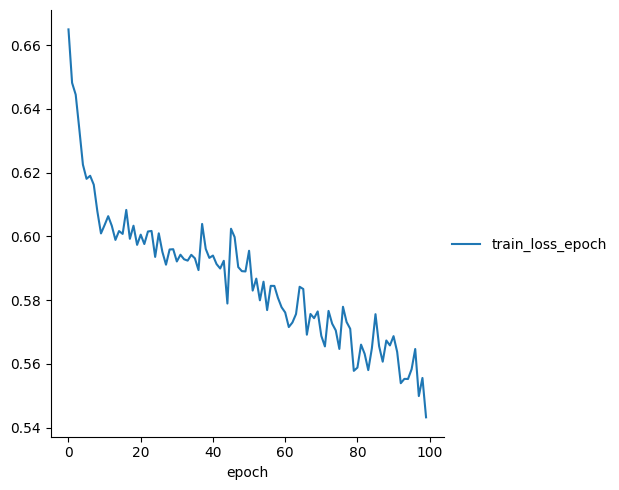

In [ ]:
metrics = pd.read_csv('/content/logs/graph_classification/version_0/metrics.csv')
train_acc = metrics[["train_loss_epoch", "epoch"]]
del metrics["step"]
train_acc.set_index("epoch", inplace=True)
sn.relplot(data=train_acc, kind="line")



## Edge prediction



In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import negative_sampling
from torch_geometric.nn import GCNConv

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
transform = T.Compose([
    T.NormalizeFeatures(),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True,
                      add_negative_train_samples=False),
])
name = "Cora"
cora_dataset = Planetoid("/Cora",name= name, transform=transform)
print(f'Dataset: {cora_dataset}:')
print('====================')
print(f'Number of graphs: {len(cora_dataset)}')
print(f'Number of features: {cora_dataset.num_features}')
print(f'Number of classes: {cora_dataset.num_classes}')

print(cora_dataset.data)
# After applying the `RandomLinkSplit` transform, the data is transformed from
# a data object to a list of tuples (train_data, val_data, test_data), with
# each element representing the corresponding split.
train_data, val_data, test_data = cora_dataset[0]


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


Processing...
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


We split the data of users into training, validation, and test splits.
This is needed in order to ensure that we leak no information about edges used during evaluation into the training phase.
For this, we made use of the [`transforms.RandomLinkSplit`](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.transforms.RandomLinkSplit.html) transformation from PyG.
This transforms randomly divides the edges in the into training, validation and test edges.
The `disjoint_train_ratio` parameter further separates edges in the training split into edges used for message passing (`edge_index`) and edges used for supervision (`edge_label_index`).

Usual convention for num_val and num_test:If set to a floating-point value in
[0,1], it represents the ratio of edges to include in the validation set. (default: 0.1)

In [ ]:
test_data

Data(x=[2708, 1433], edge_index=[2, 9502], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_label=[1054], edge_label_index=[2, 1054])

In [ ]:

class Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.in_channels = in_channels

    def forward(self, data):
        x, edge_index, batch_idx = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)


model_net = Net(cora_dataset.num_features, 128, 64)#.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()


In [ ]:
from torchmetrics.classification import Accuracy

In [ ]:
class LinkPredictor(pl.LightningModule):

    def __init__(self,in_dim, hidden_dim, out_channels):
        super().__init__()
        self.save_hyperparameters()
        self.model =Net(in_dim, hidden_dim, out_channels)
        self.loss_module = nn.BCEWithLogitsLoss()
        self.accuracy = Accuracy(task="binary")



    def forward(self, data):
        #print("linkpred",data)
        #print(data.size())
        x, edge_index, batch_idx = data.x, data.edge_index, data.batch
        #print(batch_idx)
        edge_label_index = data.edge_label_index
        # Step 1: make node embeddings using GNN.
        h = self.model(data)
        # Take source nodes embeddings- senders
        h_src = h[edge_label_index[0]]
        # Take target node embeddings - receivers
        h_dst = h[edge_label_index[1]]
        # Calculate the product between them
        out = (h_src * h_dst ).sum(dim=-1)

        return out

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=1e-3, weight_decay=0.0)
        return optimizer

    def _step(self, batch, phase: str='train'):
            yhat_edge = self(batch)
            y = batch.edge_label
            loss = self.loss_module(input=yhat_edge, target=y)
            acc = self.accuracy(yhat_edge, y)
            self.log(f"{phase}_acc_step", acc, batch_size=y.size()[0])
            self.log(f"{phase}_loss_step", loss, batch_size=y.size()[0])
            return loss

    def training_step(self, batch, batch_idx):
        return self._step(batch, "train")

    def validation_step(self, batch, batch_idx):
        return self._step(batch, "val")

    def test_step(self, batch, batch_idx):
        return self._step(batch, "test")

    def predict_step(self, batch):
        x, edge_index = batch
        return self(x, edge_index)


## Defining Mini-batch Loaders

For large graphs that can't fit onto GPU memory we need to use mini-batches!
this step is not strictly necessary for small-scale graphs (we didn't use it before, but if you will work with large graphs you will need it)
A mini-batch loader will generate subgraphs that can be used as input into our GNN.
We can use of the [`loader.LinkNeighborLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html#torch_geometric.loader.LinkNeighborLoader) which samples multiple hops from both ends of a link and creates a subgraph from it.
Here, `edge_label_index` serves as the "seed links" to start sampling from.

In [ ]:
from pytorch_lightning.callbacks import EarlyStopping

In [ ]:
# Creating an EarlyStopping callback instance
# Specify the metric to monitor for early stopping.
# Minimum change in the monitored metric to qualify as an improvement.
# Patience: Number of epochs with no improvement after which training will be stopped.
# Verbose: If True, prints messages about early stopping to the console.
# Mode: "max" means training will stop when the monitored metric stops increasing.

early_stop_callback = EarlyStopping(monitor = "val_acc_step", min_delta = 0.0, patience = 3   # ...
)


In [ ]:
# In the first hop, we sample at most 20 neighbors.
# In the second hop, we sample at most 10 neighbors.
# In addition, during training, we want to sample negative edges on-the-fly with
# a ratio of 2:1.
# We can make use of the `loader.LinkNeighborLoader` from PyG:
from torch_geometric.loader import LinkNeighborLoader

# Define seed edges:
edge_label_index = train_data.edge_label_index
edge_label = train_data.edge_label

train_loader = LinkNeighborLoader(
    data= train_data,
    num_neighbors= [20,10],
    neg_sampling_ratio= 10,
    edge_label_index=train_data.edge_label_index,
    edge_label=train_data.edge_label,
    batch_size=128,
    shuffle=True,
)

val_loader = LinkNeighborLoader(
    data=val_data,
    num_neighbors=[20, 10],
    edge_label_index= edge_label_index,
    edge_label=edge_label,
    batch_size=3 * 128,
    shuffle=False,
)


test_loader = LinkNeighborLoader(
    data=test_data,
    num_neighbors=[20, 10],
    edge_label_index= edge_label_index,
    edge_label=edge_label,
    batch_size=3 * 128,
    shuffle=False,
)

# Inspect a sample:
sampled_data = next(iter(train_loader))

print("Sampled mini-batch:")
print("===================")
print(sampled_data)

Sampled mini-batch:
Data(x=[2643, 1433], edge_index=[2, 8329], y=[2643], train_mask=[2643], val_mask=[2643], test_mask=[2643], edge_label=[1408], edge_label_index=[2, 1408], n_id=[2643], e_id=[8329], input_id=[128])


/usr/local/lib/python3.10/dist-packages/torch_geometric/sampler/neighbor_sampler.py:60: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


### Create the callbacks

In [ ]:
# Define a ModelCheckpoint callback
from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    monitor = "val_acc_step",
    mode = "max",
    dirpath = "cora/",
    filename = "best"
)

### Creating a PyTorch Lightning Trainer instance

# Creating a PyTorch Lightning Trainer instance with specified options

Specifies:
- the default root directory for storing logs, checkpoints, etc.
- Accelerator to use for training (e.g., 'dp' for DataParallel).
- Maximum number of training epochs.
- Logger for experiment tracking (e.g., TensorBoardLogger).
- log_every_n_steps: Log metrics every n training steps.
- List of callback instances (e.g., EarlyStopping, ModelCheckpoint).

In [ ]:
model = LinkPredictor(cora_dataset.num_features, 128, 64)

trainer = pl.Trainer ( default_root_dir= "cora/Link_prediction",
                      accelerator= "gpu",
                       max_epochs = 20,
                       logger = logger,
                       log_every_n_steps= 5,
                       callbacks = [early_stop_callback, checkpoint_callback]

)

model(next(iter(train_loader)))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


tensor([0.0011, 0.0005, 0.0008,  ..., 0.0005, 0.0010, 0.0012],
       grad_fn=<SumBackward1>)

In [ ]:
trainer.validate(model, val_loader)


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_acc_step        │            0.0            │
│       val_loss_step       │    0.6925676465034485     │
└───────────────────────────┴───────────────────────────┘

[{'val_acc_step': 0.0, 'val_loss_step': 0.6925676465034485}]

In [ ]:
# Train the model
trainer.fit(model=model, train_dataloaders=train_loader)#, val_dataloaders=val_loader)
#print(f"Accuracy on test dataset:  {100.0*test_accuracy[0]['test_acc_step']:4.2f}%")

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type              | Params
--------------------------------------------------
0 | model       | Net               | 191 K 
1 | loss_module | BCEWithLogitsLoss | 0     
2 | accuracy    | BinaryAccuracy    | 0     
--------------------------------------------------
191 K     Trainable params
0         Non-trainable params
191 K     Total params
0.767     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to

Training: |          | 0/? [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
trainer.test(model,test_loader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_acc_step       │    0.9959892630577087     │
│      test_loss_step       │    0.40293174982070923    │
└───────────────────────────┴───────────────────────────┘

[{'test_acc_step': 0.9959892630577087, 'test_loss_step': 0.40293174982070923}]

Sources:
https://github.com/pyg-team/pytorch_geometric/tree/master/examples
